In [215]:
import pandas as pd
pd.set_option('display.max.columns', None)
pd.set_option('display.precision', 2)

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv'
df = pd.read_csv(url)
df.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,NaN


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In [217]:
df.describe().round(2).T
# df.describe(include=object)

,count,mean,std,min,25%,50%,75%,max
gameorder,126314.0,31579.00,18231.93,1.00,15790.00,31579.00,47368.00,63157.00
_iscopy,126314.0,0.50,0.50,0.00,0.00,0.50,1.00,1.00
year_id,126314.0,1988.20,17.58,1947.00,1975.00,1990.00,2003.00,2015.00
seasongame,126314.0,43.53,25.38,1.00,22.00,43.00,65.00,108.00
is_playoffs,126314.0,0.06,0.24,0.00,0.00,0.00,0.00,1.00
pts,126314.0,102.73,14.81,0.00,93.00,103.00,112.00,186.00
elo_i,126314.0,1495.24,112.14,1091.64,1417.24,1500.95,1576.06,1853.10
elo_n,126314.0,1495.24,112.46,1085.77,1416.99,1500.95,1576.29,1853.10
win_equiv,126314.0,41.71,10.63,10.15,34.10,42.11,49.64,71.11
opp_pts,126314.0,102.73,14.81,0.00,93.00,103.00,112.00,186.00


In [218]:
df.loc[df['fran_id'] == 'Lakers', 'team_id'].value_counts()

team_id
LAL    5078
MNL     946
Name: count, dtype: int64

In [219]:
df['game_played'] = pd.to_datetime(df['date_game'])
df['game_played'].head()

0   1946-11-01
1   1946-11-01
2   1946-11-02
3   1946-11-02
4   1946-11-02
Name: game_played, dtype: datetime64[ns]

In [220]:
df.loc[df['team_id'] == 'MNL', 'game_played'].agg(['min', 'max'])

min   1948-11-04
max   1960-03-26
Name: game_played, dtype: datetime64[ns]

In [221]:
df[df["fran_id"].str.startswith('Bom')]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,game_played
9,5,194611020STB,NBA,0,1947,11/2/1946,1,0,STB,Bombers,56,1300.00,1304.69,41.49,PIT,Ironmen,51,1300.00,1295.31,H,W,0.64,NaN,1946-11-02
16,9,194611050DTF,NBA,1,1947,11/5/1946,2,0,STB,Bombers,53,1304.69,1312.85,42.35,DTF,Falcons,49,1279.62,1271.46,A,W,0.39,NaN,1946-11-05
22,12,194611070STB,NBA,0,1947,11/7/1946,3,0,STB,Bombers,63,1312.85,1302.60,41.27,NYK,Knicks,68,1297.07,1307.32,H,L,0.66,NaN,1946-11-07
32,17,194611090STB,NBA,0,1947,11/9/1946,4,0,STB,Bombers,70,1302.60,1305.73,41.60,WSC,Capitols,69,1337.74,1334.61,H,W,0.59,NaN,1946-11-09
47,24,194611140STB,NBA,0,1947,11/14/1946,5,0,STB,Bombers,64,1305.73,1308.47,41.89,BOS,Celtics,62,1269.89,1267.15,H,W,0.69,NaN,1946-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,1480,195003120ROC,NBA,1,1950,3/12/1950,64,0,STB,Bombers,72,1366.78,1363.65,31.96,ROC,Kings,99,1647.29,1650.42,A,L,0.10,NaN,1950-03-12
2964,1483,195003140BOS,NBA,1,1950,3/14/1950,65,0,STB,Bombers,86,1363.65,1378.48,33.45,BOS,Celtics,76,1372.76,1357.94,A,W,0.35,NaN,1950-03-14
2984,1493,195003160STB,NBA,0,1950,3/16/1950,66,0,STB,Bombers,71,1378.48,1384.27,34.04,BLB,Baltimore,63,1368.74,1362.95,H,W,0.65,NaN,1950-03-16
2989,1495,195003170CHS,NBA,1,1950,3/17/1950,67,0,STB,Bombers,85,1384.27,1411.27,36.82,CHS,Stags,69,1510.53,1483.54,A,W,0.21,at Toledo OH,1950-03-17


In [222]:
print(df.columns)
df[df['notes'].notnull()].shape

Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
       'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes',
       'game_played'],
      dtype='object')


(5424, 24)

In [223]:
df[
    (df['_iscopy'] == 0) &
    (df['pts'] > 100) &
    (df['opp_pts'] > 100) &
    (df['team_id'] == 'BLB') &
    (df['game_result'] == 'W')
]

df[
    (df['_iscopy'] == 0) &
    (df['team_id'].str.startswith('LA')) &
    (df['year_id'] == 1992) &
    (df['notes'].notnull())
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,game_played
68901,34451,199205030LAC,NBA,0,1992,5/3/1992,86,1,LAC,Clippers,115,1546.90,1556.0,47.89,UTA,Jazz,107,1647.51,1638.41,H,W,0.50,"at Anaheim, CA (Anaheim Convention Center)",1992-05-03
68903,34452,199205030LAL,NBA,0,1992,5/3/1992,86,1,LAL,Lakers,76,1489.65,1474.4,39.40,POR,Trailblazers,102,1655.12,1670.37,H,L,0.41,"at Las Vegas, NV",1992-05-03


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  object        
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  elo_i          126314 non-null  float64       
 12  elo_n          126314 non-null  float64       
 13  win_equiv      126314 non-null  float64       
 14  opp_id         126314 non-null  object        
 15  

In [225]:
df.groupby('fran_id', sort=True)['pts'].sum().head()

fran_id
Baltimore     37219
Bombers       17793
Bucks        418326
Bulls        437269
Capitols      22387
Name: pts, dtype: int64

In [226]:
df[
    (df['fran_id'] == 'Lakers') &
    (df['year_id'] > 2010)
].groupby(['year_id', 'game_result'])['game_id'].count()

year_id  game_result
2011     L              31
         W              61
2012     L              32
         W              46
2013     L              41
         W              45
2014     L              55
         W              27
2015     L              61
         W              21
Name: game_id, dtype: int64

In [227]:
df[
    (df['fran_id'] == 'Warriors') & 
    (df['year_id'] == 2015)
    ].groupby(['is_playoffs', 'game_result'])['game_id'].count()

is_playoffs  game_result
0            L              15
             W              67
1            L               5
             W              16
Name: game_id, dtype: int64

In [228]:
df['game_location'].value_counts()

game_location
H    63138
A    63138
N       38
Name: count, dtype: int64

In [229]:
df['game_location'] = pd.Categorical(df['game_location'])
df['game_location'].dtype

CategoricalDtype(categories=['A', 'H', 'N'], ordered=False)

In [230]:
df.dtypes[df.dtypes.values == 'object'].index

Index(['game_id', 'lg_id', 'date_game', 'team_id', 'fran_id', 'opp_id',
       'opp_fran', 'game_result', 'notes'],
      dtype='object')

In [231]:
df.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,game_played
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN,1946-11-01
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN,1946-11-01
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN,1946-11-02
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,NaN,1946-11-02
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,NaN,1946-11-02


In [232]:
for col in df.columns:
    if df[col].dtype == 'object':
        for c in df[col].value_counts().index:
            if len(c) == 1:
                print(f'col_name: {col} - uniq_val: {c}') 

df['game_result'] = df['game_result'].astype('category')
print(df['game_result'].dtype)
print(df['game_result'].cat.categories)

col_name: game_result - uniq_val: L
col_name: game_result - uniq_val: W
category
Index(['L', 'W'], dtype='object')


In [233]:
print(f'before: {df.shape}')
nan_series = df.isna().sum()

for idx in nan_series.index:
    if nan_series[idx] > 0:
        print(f'{idx}: {nan_series[idx]} of NaN')

df_miss_cols = df.drop(columns='notes', axis=1)
print(f'after: {df_miss_cols.shape}')

before: (126314, 24)
notes: 120890 of NaN
after: (126314, 23)


In [234]:
df_default_notes = df.copy()
df_default_notes['notes'].fillna(value='no notes at all', inplace=True)
df_default_notes['notes'].describe()

count              126314
unique                232
top       no notes at all
freq               120890
Name: notes, dtype: object

In [235]:
# INVALID VALUES
df.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast,game_played
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50,1988-04-09 00:53:18.429311104
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02,1946-11-01 00:00:00
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33,1974-11-08 00:00:00
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50,1990-02-06 00:00:00
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67,2003-03-19 00:00:00
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98,2015-06-16 00:00:00
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22,NaN


In [236]:
# Inconsistent Values
df[
    (df['pts'] > df['opp_pts']) & 
    (df['game_result'] != 'W')
    ].empty

df[
    (df['pts'] < df['opp_pts']) & 
    (df['game_result'] != 'L')
    ].empty

True

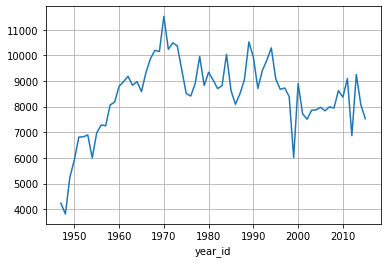

In [237]:
import matplotlib.pyplot as plt

df[df['fran_id'] == 'Knicks'].groupby(by='year_id', sort=True)['pts'].sum().plot()
plt.grid()

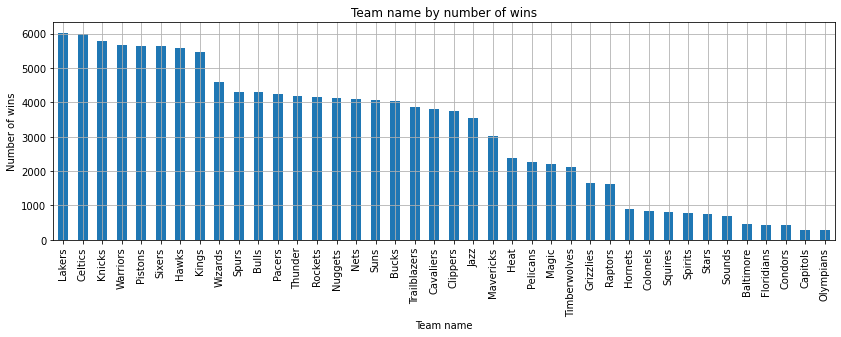

In [261]:
df['fran_id'].value_counts().nlargest(40).plot(kind='bar', figsize=(14, 4))
plt.title('Team name by number of wins')
plt.xlabel('Team name')
plt.ylabel('Number of wins')
plt.grid()
plt.show()

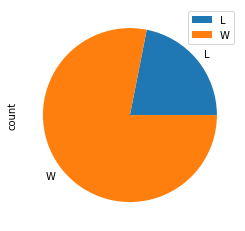

In [262]:
df[df['fran_id'].str.startswith('Miami')]
df[(df['fran_id'] == 'Heat') & (df['year_id'] == 2013)].groupby(by=['game_result'])['game_id'].count().plot(kind='pie')
df[(df['fran_id'] == 'Heat') & (df['year_id'] == 2013)].value_counts().plot(kind='pie')
plt.legend()

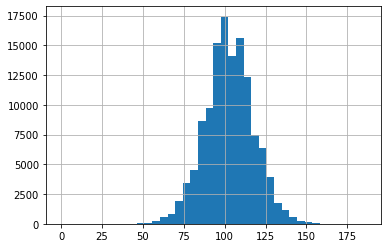

<Axes: xlabel='pts'>

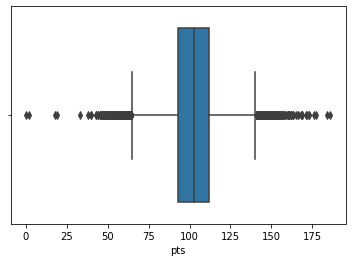

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df['pts'], bins=40)
plt.grid()
plt.show()

sns.boxplot(x=df['pts'])

In [241]:
df.select_dtypes('category').columns
df.select_dtypes('object').columns
df.select_dtypes('number').columns

Index(['gameorder', '_iscopy', 'year_id', 'seasongame', 'is_playoffs', 'pts',
       'elo_i', 'elo_n', 'win_equiv', 'opp_pts', 'opp_elo_i', 'opp_elo_n',
       'forecast'],
      dtype='object')

In [242]:
num_cols = df.select_dtypes('number').columns
df_num = df[num_cols]
q1 = df_num.quantile(0.25)
q3 = df_num.quantile(0.75)
iqr = q3 - q1
print(iqr)

gameorder      31578.00
_iscopy            1.00
year_id           28.00
seasongame        43.00
is_playoffs        0.00
pts               19.00
elo_i            158.82
elo_n            159.30
win_equiv         15.53
opp_pts           19.00
opp_elo_i        158.82
opp_elo_n        159.30
forecast           0.34
dtype: float64


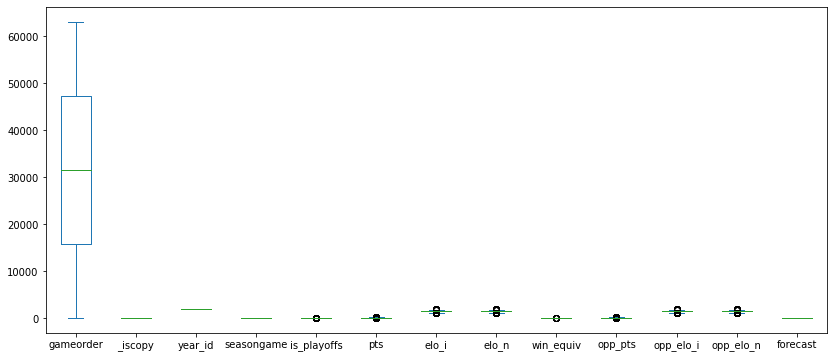

<Axes: xlabel='pts'>

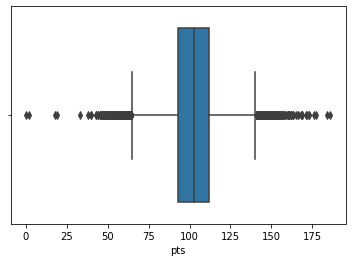

In [249]:
df_num.plot(kind='box', figsize=(14, 6))
plt.show()
sns.boxplot(x=df_num['pts'])

(126314, 13)
(80660, 13)


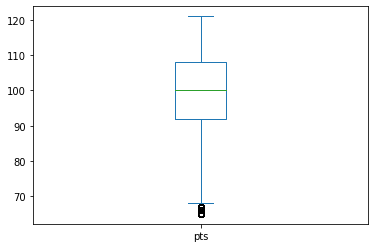

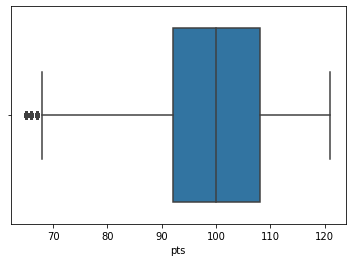

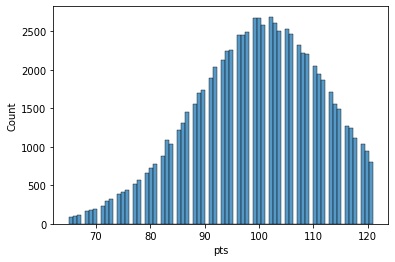

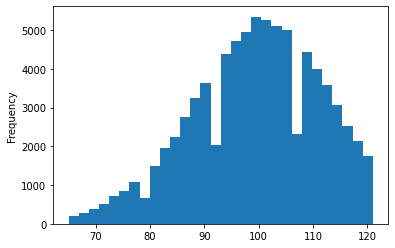

min     65
max    121
Name: pts, dtype: int64


count    80660.00
mean        99.34
std         11.67
min         65.00
25%         92.00
50%        100.00
75%        108.00
max        121.00
Name: pts, dtype: float64

In [254]:
# removing outliers based on Inter Quantile Range

print(df_num.shape)

df_num_outliers = df_num[~((df_num < (q1 - 1.5 * iqr)) | (df_num > (q1 + 1.5 * iqr))).any(axis=1)]
print(df_num_outliers.shape)

df_num_outliers['pts'].plot(kind='box')
plt.show()
sns.boxplot(x=df_num_outliers['pts'])
plt.show()

sns.histplot(x=df_num_outliers['pts'])
plt.show()
df_num_outliers['pts'].plot(kind='hist', bins=30)
plt.show()

print(df_num_outliers['pts'].agg(['min', 'max']))
df_num_outliers['pts'].describe()

In [245]:
import pandas as pd

data = {
    'A': [10, 12, 14, 1000],
    'B': [20, 22, 24, -999]
}
d = pd.DataFrame(data)
d

,A,B
0,10,20
1,12,22
2,14,24
3,1000,-999


In [246]:
# removing outliers based on Inter Quantile Range

Q1 = d.quantile(0.25)
Q3 = d.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print((Q1 - 1.5*IQR))
print((Q1 + 1.5*IQR))

d[~((d < (Q1 - 1.5*IQR) | (d > (Q1 + 1.5*IQR))).any(axis=1))]

A    249.00
B    257.25
dtype: float64
A   -362.00
B   -620.62
dtype: float64
A    385.00
B    151.12
dtype: float64


,A,B
0,10,20
1,12,22
2,14,24


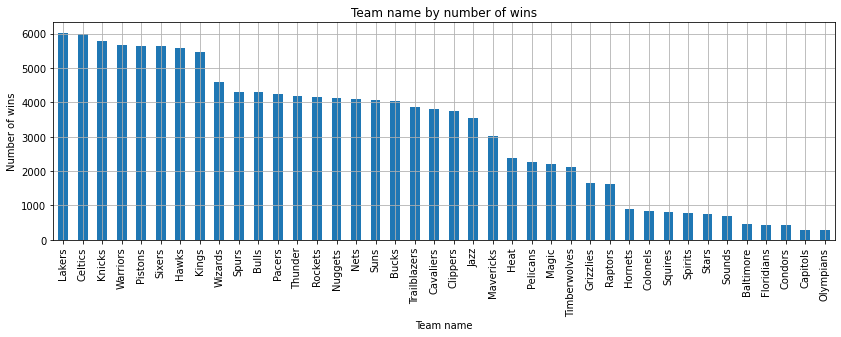

In [263]:
df['fran_id'].value_counts().nlargest(40).plot(kind='bar', figsize=(14, 4))
plt.title('Team name by number of wins')
plt.xlabel('Team name')
plt.ylabel('Number of wins')
plt.grid()
plt.show()

<Axes: >

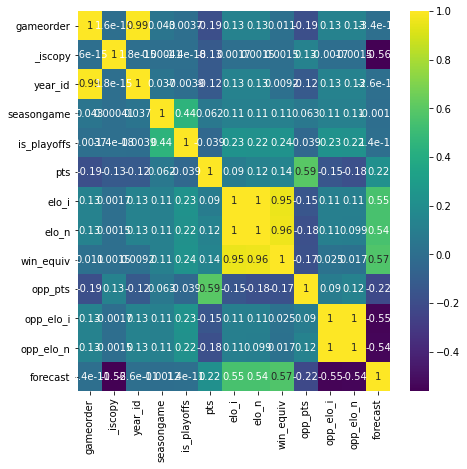

In [271]:
plt.figure(figsize=(7, 7))
c = df_num.corr()
sns.heatmap(c, cmap='viridis', annot=True)

Text(0, 0.5, 'Wins')

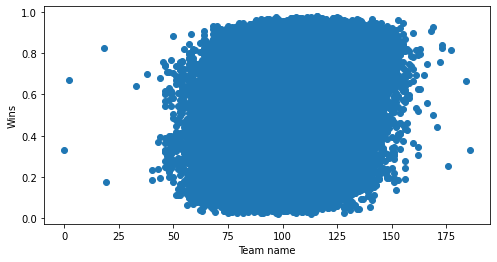

In [277]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(df['pts'], df['forecast'])
ax.set_xlabel('Team name')
ax.set_ylabel("Wins")
